# This notebook shows implementation of k-means clustering on synthetic data 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial import distance
import collections

In [15]:
np.random.seed(42)

### Generate random 2-D data

In [34]:
n = 100 #data points

Y = np.random.randn(n)
X1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/2))   #draw from a Gaussian distribution
X2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)

In [40]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()

,X,Y
0,-3.901402,-0.250757
1,-3.116876,-0.146531
2,-2.451599,0.108610
3,-4.325299,0.171217
4,-2.863600,-1.229696


### Visualize the generated data

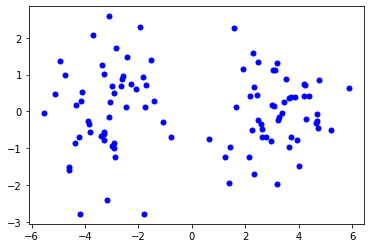

In [36]:
plt.scatter(X, Y, s =25, c = 'b')
plt.show()

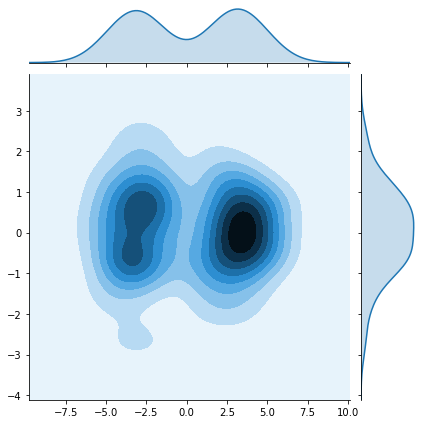

In [38]:
sns.jointplot(x=X, y=Y, kind="kde")

### Implement k-means clustering from scratch

In [280]:
def kmeans(data, k):
    #initialize centroids randomly:
    centroids = data.sample(k, axis=0)   #draw random data points without replacement
    
    converged = False
    previousCentroids = None
    iteration = 1
    clusterAssignments = [-1] * len(data.index)
    while not converged:
        #compare each data point to the centroids and assign a label:
        for i in range(len(data.index)):
            distances = []
            for j in range(len(centroids.index)):
                distances.append(distance.euclidean(data.iloc[i], centroids.iloc[j]))
            clusterAssignments[i] = distances.index(min(distances))
        
        #plot if data is 2-D:
        if len(centroids.columns) == 2:
            plt.scatter(data.iloc[:,0],data.iloc[:,1], s=25, c=clusterAssignments)
            plt.scatter(centroids.iloc[0,0],centroids.iloc[0,1], s=200, c='green', marker="X")
            plt.scatter(centroids.iloc[1,0],centroids.iloc[1,1], s=200, c='red', marker="X")
            plt.title("Iteration "+str(iteration))
            plt.show()
                                        
        #compute and update new centroids:
        previousCentroids = centroids.copy()
        for i in range(k):
            clusterMemberIndices = np.where(np.array(clusterAssignments) == i)[0]
            clusterMembers = data.loc[clusterMemberIndices]
            dtDim = (len(clusterMembers.index), len(clusterMembers.columns))
            clusterCentroid = np.array([np.sum(clusterMembers.iloc[:, l])/dtDim[0] for l in range(dtDim[1])])
            centroids.iloc[i] = clusterCentroid
            
        #check for convergence (difference between current and old centroids):
        if iteration > 1:
            converged = True
            for i in range(len(centroids.index)):
                if distance.euclidean(centroids.iloc[i], previousCentroids.iloc[i]) > 0.2:
                    converged = False
                    
        iteration += 1
        
    return centroids, clusterAssignments

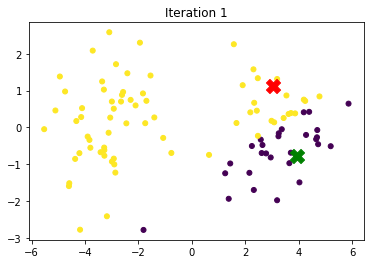

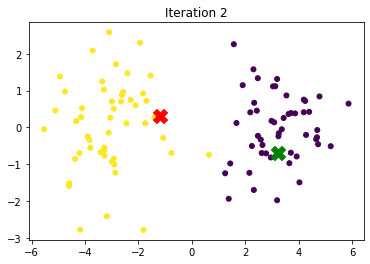

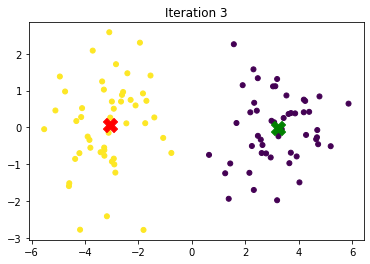

In [281]:
centroids, clusterAssignments = kmeans(dt, 2)

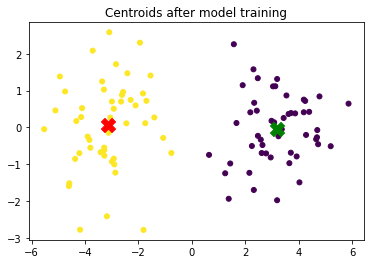

In [282]:
plt.scatter(dt.iloc[:,0],dt.iloc[:,1], s=25, c=clusterAssignments)
plt.scatter(centroids.iloc[0,0],centroids.iloc[0,1], s=200, c='green', marker="X")
plt.scatter(centroids.iloc[1,0],centroids.iloc[1,1], s=200, c='red', marker="X")
plt.title("Centroids after model training")
plt.show()

### Use scikitlearn library to perform k-means clustering

In [46]:
model = KMeans(n_clusters=2).fit(dt)
print(model.cluster_centers_)

[[ 3.18269112 -0.03927725]
 [-3.13909904  0.07145507]]


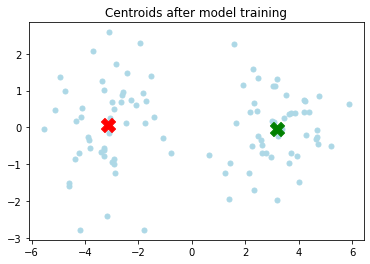

In [95]:
plt.scatter(X, Y, s=25, c = 'lightblue')
plt.scatter(model.cluster_centers_[0][0],model.cluster_centers_[0][1], s=200, c='green', marker="X")
plt.scatter(model.cluster_centers_[1][0],model.cluster_centers_[1][1], s=200, c='red', marker="X")
plt.title("Centroids after model training")
plt.show()

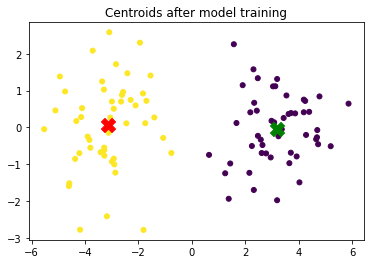

In [285]:
predLabels = model.predict(dt)

plt.scatter(X, Y, s=25, c=predLabels)
plt.scatter(model.cluster_centers_[0][0],model.cluster_centers_[0][1], s=200, c='green', marker="X")
plt.scatter(model.cluster_centers_[1][0],model.cluster_centers_[1][1], s=200, c='red', marker="X")
plt.title("Centroids after model training")
plt.show()